In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("spam.csv", encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [6]:
df.rename(columns= {'v1':'is_spam','v2':'description'},inplace=True)

In [7]:
df.head()

,is_spam,description
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.isnull().sum()

is_spam        0
description    0
dtype: int64

In [9]:
df.shape

(5572, 2)

In [10]:
df.duplicated().sum()

403

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(5169, 2)

In [13]:
df['spam'] = df['is_spam'].map({'ham':'0','spam':'1'})

In [14]:
df.head()

,is_spam,description,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<Axes: xlabel='spam', ylabel='count'>

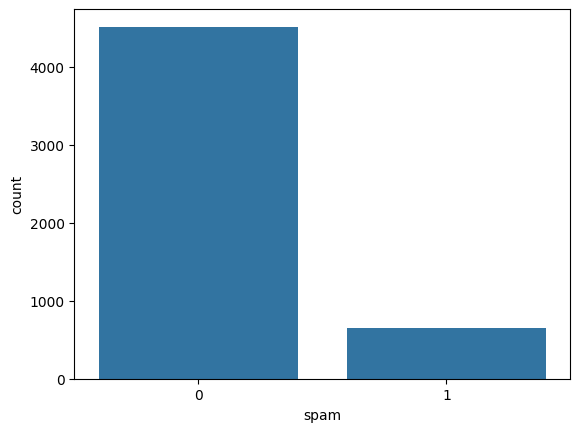

In [15]:
sns.countplot(data=df,x="spam")

In [16]:
df['message_len'] = df.description.apply(len)
df.head()

,is_spam,description,spam,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

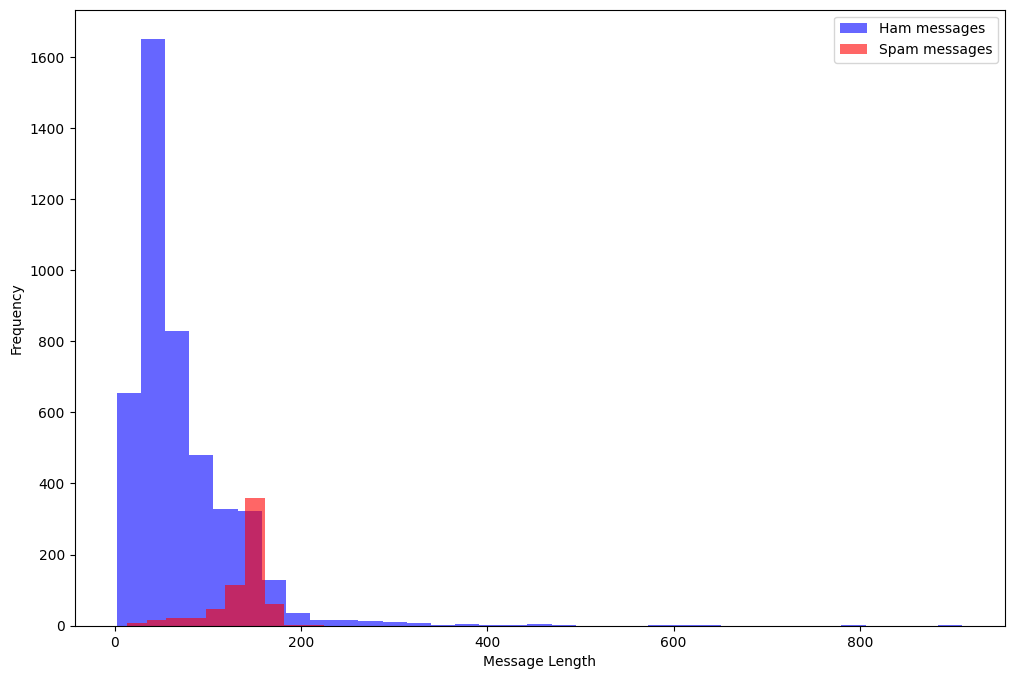

In [17]:
plt.figure(figsize=(12, 8))

df[df.is_spam=='ham'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
df[df.is_spam=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [18]:
df[df.is_spam=='ham'].describe()

,message_len
count,4516.000000
mean,70.459256
std,56.358207
min,2.000000
25%,34.000000
50%,52.000000
75%,90.000000
max,910.000000


In [19]:
df[df.is_spam=='spam'].describe()

,message_len
count,653.000000
mean,137.891271
std,30.137753
min,13.000000
25%,132.000000
50%,149.000000
75%,157.000000
max,224.000000


In [23]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Parthiban\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [24]:
df['clean_msg'] = df.description.apply(text_process)

df.head()

,is_spam,description,spam,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [27]:
from collections import Counter

words = df[df.is_spam=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))

[('get', 295), ('ltgt', 254), ('ok', 246), ('go', 239), ('got', 225), ('know', 221), ('like', 219), ('come', 208), ('ill', 205), ('good', 205), ('call', 184), ('time', 181), ('love', 168), ('day', 168), ('going', 162), ('want', 159), ('lor', 157), ('one', 155), ('need', 152), ('home', 151), ('still', 141), ('see', 133), ('think', 126), ('back', 126), ('da', 124), ('well', 124), ('r', 120), ('sorry', 119), ('n', 118), ('ì', 117), ('tell', 116), ('today', 115), ('hi', 112), ('take', 109), ('oh', 108), ('send', 108), ('much', 108), ('hey', 106), ('cant', 103), ('night', 101), ('later', 99), ('hope', 96), ('great', 94), ('way', 94), ('happy', 94), ('wat', 91), ('thats', 91), ('already', 89), ('give', 89), ('ask', 87)]


In [28]:
words = df[df.is_spam=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))

[('call', 303), ('free', 188), ('txt', 126), ('mobile', 105), ('text', 103), ('stop', 103), ('claim', 96), ('reply', 93), ('prize', 81), ('get', 69), ('new', 64), ('urgent', 58), ('send', 57), ('nokia', 54), ('cash', 51), ('contact', 51), ('service', 48), ('win', 47), ('please', 47), ('phone', 43), ('guaranteed', 42), ('per', 41), ('customer', 40), ('18', 38), ('tone', 38), ('16', 37), ('week', 37), ('chat', 35), ('draw', 33), ('awarded', 31), ('mins', 31), ('line', 31), ('go', 30), ('latest', 29), ('message', 29), ('shows', 29), ('150ppm', 29), ('å£2000', 29), ('landline', 29), ('1', 28), ('å£1000', 28), ('want', 28), ('video', 28), ('receive', 27), ('code', 27), ('holiday', 27), ('number', 27), ('msg', 26), ('box', 26), ('tcs', 26)]


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

x = df.clean_msg
y = df.spam

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)






In [31]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000) 


X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)


X_test_tfidf = tfidf_vectorizer.transform(x_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)



Naive Bayes Accuracy: 0.9690522243713733


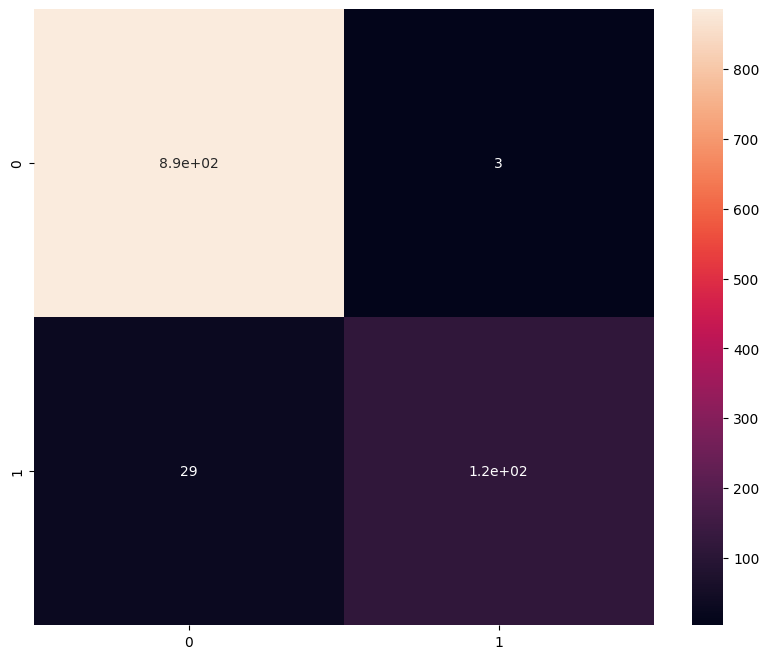

In [33]:
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)
cm = confusion_matrix(y_test,nb_predictions)
%matplotlib inline
plt.figure(figsize=((10,8)))
sns.heatmap(cm,annot = True)

plt.show()

In [34]:
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)
lr_predictions = lr_classifier.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_predictions)


Logistic Regression Accuracy: 0.965183752417795


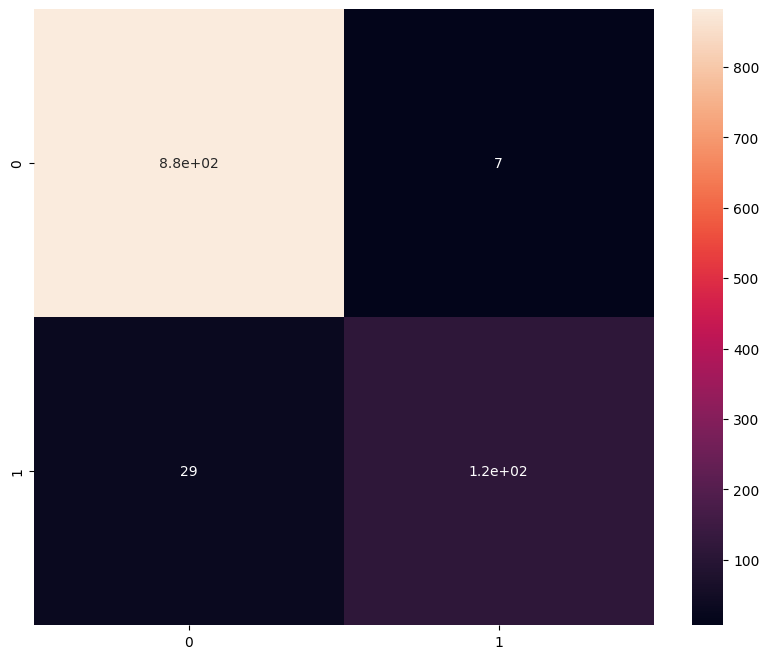

In [36]:
print("Logistic Regression Accuracy:", lr_accuracy)
cm = confusion_matrix(y_test,lr_predictions)
%matplotlib inline
plt.figure(figsize=((10,8)))
sns.heatmap(cm,annot = True)

plt.show()

In [37]:
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = lr_classifier.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_predictions)


Support Vector Classifier Accuracy: 0.965183752417795


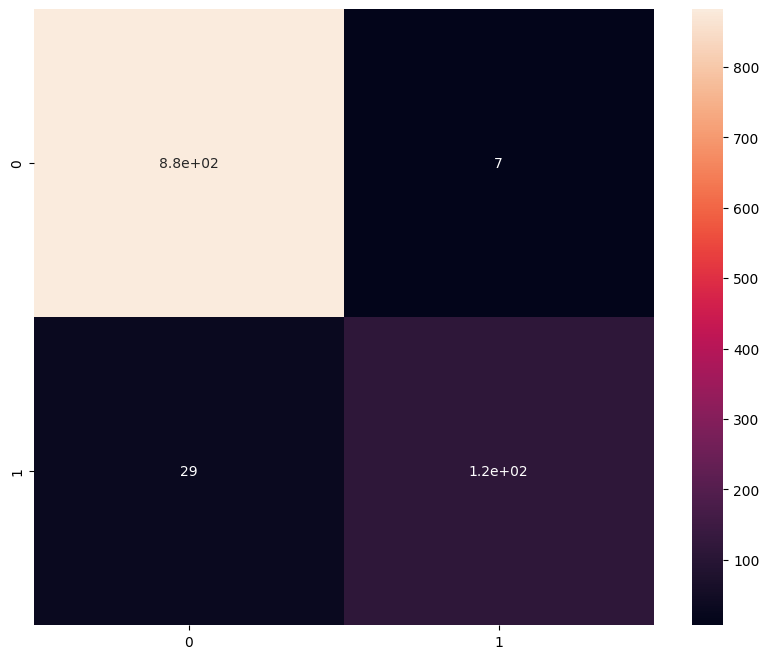

In [39]:
print("Support Vector Classifier Accuracy:", svm_accuracy)
cm = confusion_matrix(y_test,svm_predictions)
%matplotlib inline
plt.figure(figsize=((10,8)))
sns.heatmap(cm,annot = True)

plt.show()